# **Exploratory Data Analysis (EDA)**

In [11]:
import os

import numpy as np

import librosa
import numba

from plotly.offline import iplot
import plotly.graph_objs as go

import IPython.display as ipd

In [4]:
# Working directory
os.chdir('../../')
print(os.getcwd())

/Users/juanpablo/Desktop/NNFL


In [5]:
# EDA
audiopath = 'data/audio/'
words = os.listdir(audiopath)
words.remove('.DS_Store')
words.remove('_background_noise_')


print(words)
print(len(words))

size = [len(os.listdir(audiopath+w)) for w in words]
print(size)

print('\n The total number of words recordings in {}'.format(np.sum(size)))

['right', 'eight', 'cat', 'tree', 'bed', 'happy', 'go', 'dog', 'no', 'wow', 'nine', 'left', 'stop', 'three', 'sheila', 'one', 'bird', 'zero', 'seven', 'up', 'marvin', 'two', 'house', 'down', 'six', 'yes', 'on', 'five', 'off', 'four']
30
[2367, 2352, 1733, 1733, 1713, 1742, 2372, 1746, 2375, 1745, 2364, 2353, 2380, 2356, 1734, 2370, 1731, 2376, 2377, 2375, 1746, 2373, 1750, 2359, 2369, 2377, 2367, 2357, 2357, 2372]

 The total number of words recordings in 64721


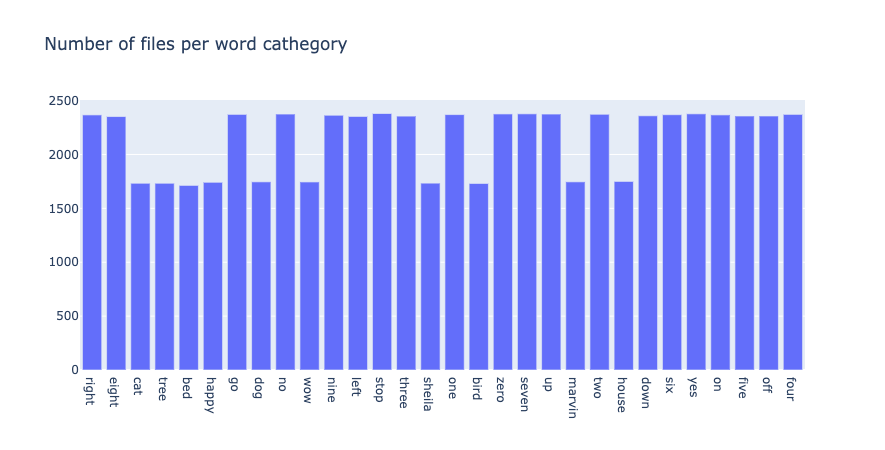

In [12]:
# Number of audio files per word cathegory:
data = [go.Bar(x=words,
            y=size)]
layout = go.Layout(title='Number of files per word cathegory')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [8]:
# Load an example
samples, sample_rate = librosa.load(audiopath+'happy/0b77ee66_nohash_1.wav')

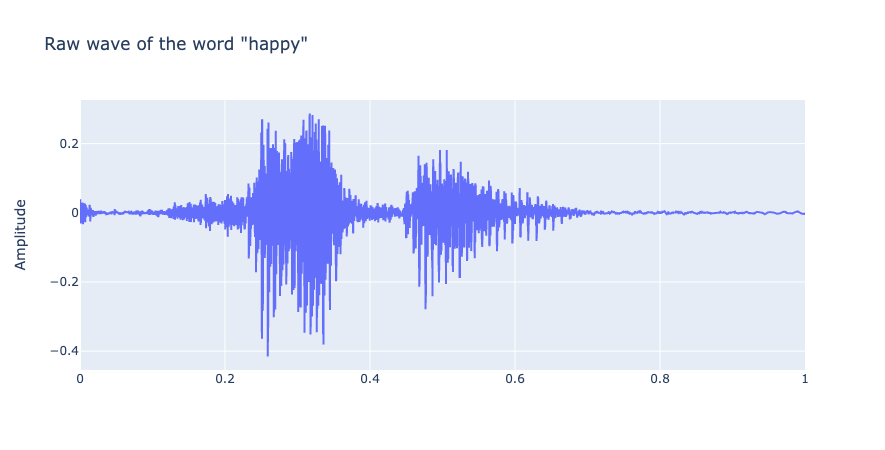

In [9]:
# Plot the example
trace = go.Scatter(x=np.linspace(0, sample_rate/len(samples), len(samples)),
                   y=samples,
                   mode='lines')
layout = go.Layout(title='Raw wave of the word "happy"', 
                   yaxis_title='Amplitude')
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Audio sample
ipd.Audio(samples, rate=sample_rate)

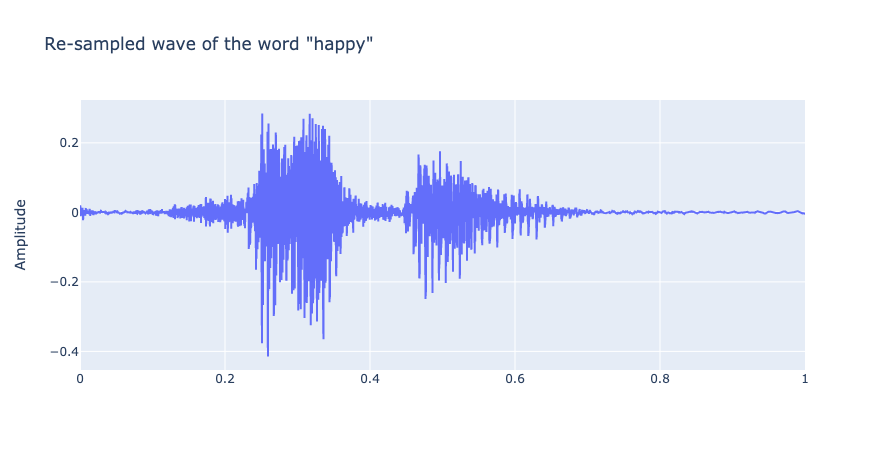

In [10]:
# Example of word happy after re-sampling
target_sr = 8000
samples_rs = librosa.resample(samples, sample_rate, target_sr)

trace = go.Scatter(x=np.linspace(0, target_sr/len(samples_rs), len(samples_rs)),
                   y=samples_rs,
                   mode='lines')
layout = go.Layout(title='Re-sampled wave of the word "happy"', 
                   yaxis_title='Amplitude')
fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Audio sample
ipd.Audio(samples_rs, rate=target_sr)